# Utilities

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Loading the dataset


In [ ]:
df = pd.read_csv('E_Commerce.csv')
df.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


# Data Preprocessing

In [ ]:
#Check the shape of the dataset
df.shape

(10999, 11)

In [ ]:
# Check for unique values
df.columns
cols = ['Warehouse_block','Mode_of_Shipment','Product_importance', 'Gender']

for i in cols:
    print(i,": ", df[i].unique(),"\n")

Warehouse_block :  [3 4 0 1 2] 

Mode_of_Shipment :  [0 2 1] 

Product_importance :  [1 2 0] 

Gender :  [0 1] 



In [ ]:
#Check data types of the columns
df.dtypes

,0
Warehouse_block,object
Mode_of_Shipment,object
Customer_care_calls,int64
Customer_rating,int64
Cost_of_the_Product,int64
Prior_purchases,int64
Product_importance,object
Gender,object
Discount_offered,int64
Weight_in_gms,int64


In [ ]:
#Drop column
df.drop(['ID'], axis=1, inplace=True)



In [ ]:
#Check null/missing values
df.isnull().sum()

,0
Warehouse_block,0
Mode_of_Shipment,0
Customer_care_calls,0
Customer_rating,0
Cost_of_the_Product,0
Prior_purchases,0
Product_importance,0
Gender,0
Discount_offered,0
Weight_in_gms,0


In [ ]:
#Check duplicate values
df.duplicated().sum()

0

In [ ]:
df.describe()


,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
count,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000
mean,4.054459,2.990545,210.196836,3.567597,13.373216,3634.016729,0.596691
std,1.141490,1.413603,48.063272,1.522860,16.205527,1635.377251,0.490584
min,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000,0.000000
25%,3.000000,2.000000,169.000000,3.000000,4.000000,1839.500000,0.000000
50%,4.000000,3.000000,214.000000,3.000000,7.000000,4149.000000,1.000000
75%,5.000000,4.000000,251.000000,4.000000,10.000000,5050.000000,1.000000
max,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000,1.000000


In [ ]:
df.head()

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,D,Flight,4,2,177,3,low,F,44,1233,1
1,F,Flight,4,5,216,2,low,M,59,3088,1
2,A,Flight,2,2,183,4,low,M,48,3374,1
3,B,Flight,3,3,176,4,medium,M,10,1177,1
4,C,Flight,2,2,184,3,medium,F,46,2484,1


# Exploratory Data Analysis

Text(0.5, 1.0, 'Gender Distribution')

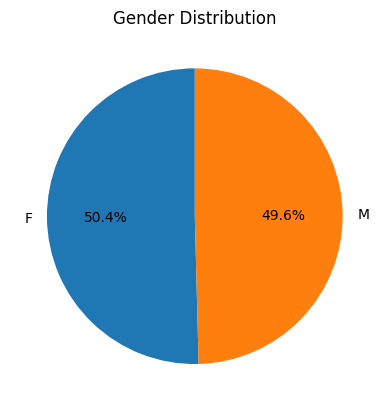

In [ ]:
plt.pie(df['Gender'].value_counts(),labels = ['F','M'], autopct='%1.1f%%', startangle=90)
plt.title('Gender Distribution')


Text(0.5, 1.0, 'Cost of the Product')

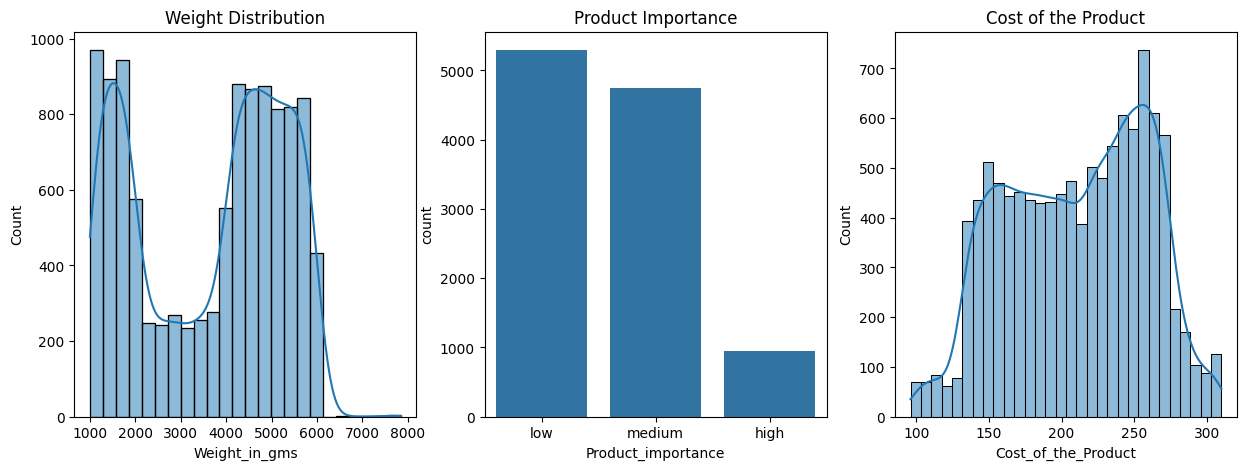

In [ ]:
# #### Product Properties
fig, ax = plt.subplots(1,3,figsize=(15,5))
sns.histplot(df['Weight_in_gms'], ax=ax[0], kde=True).set_title('Weight Distribution')
sns.countplot(x = 'Product_importance', data = df, ax=ax[1]).set_title('Product Importance')
sns.histplot(df['Cost_of_the_Product'], ax=ax[2], kde=True).set_title('Cost of the Product')



Text(0.5, 1.0, 'Reached on Time')

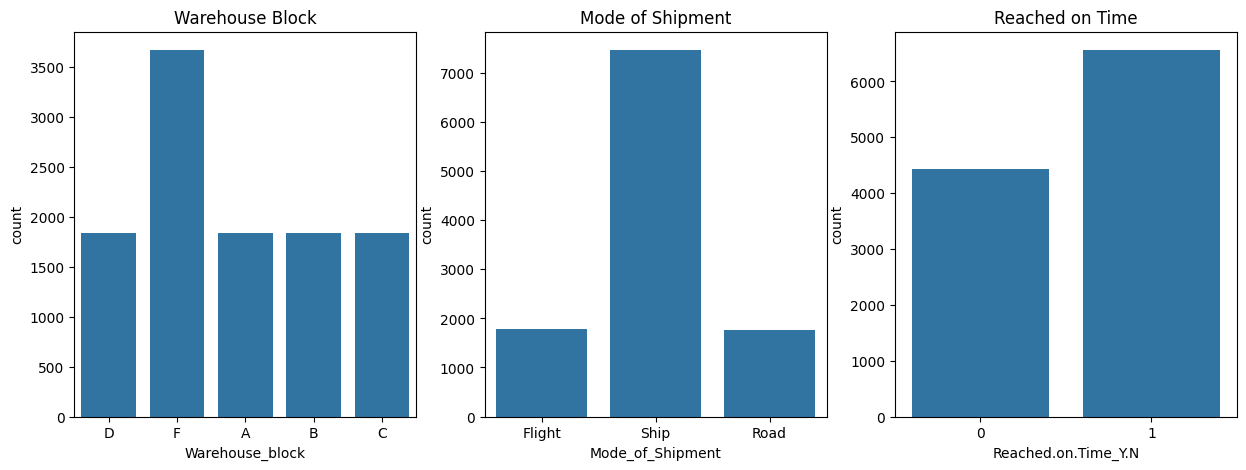

In [ ]:
#Logistics
fig, ax = plt.subplots(1,3,figsize=(15,5))
sns.countplot(x = 'Warehouse_block', data = df, ax=ax[0]).set_title('Warehouse Block')
sns.countplot(x = 'Mode_of_Shipment', data = df, ax=ax[1]).set_title('Mode of Shipment')
sns.countplot(x = 'Reached.on.Time_Y.N', data = df, ax=ax[2]).set_title('Reached on Time')



Text(0.5, 1.0, 'Discount Offered')

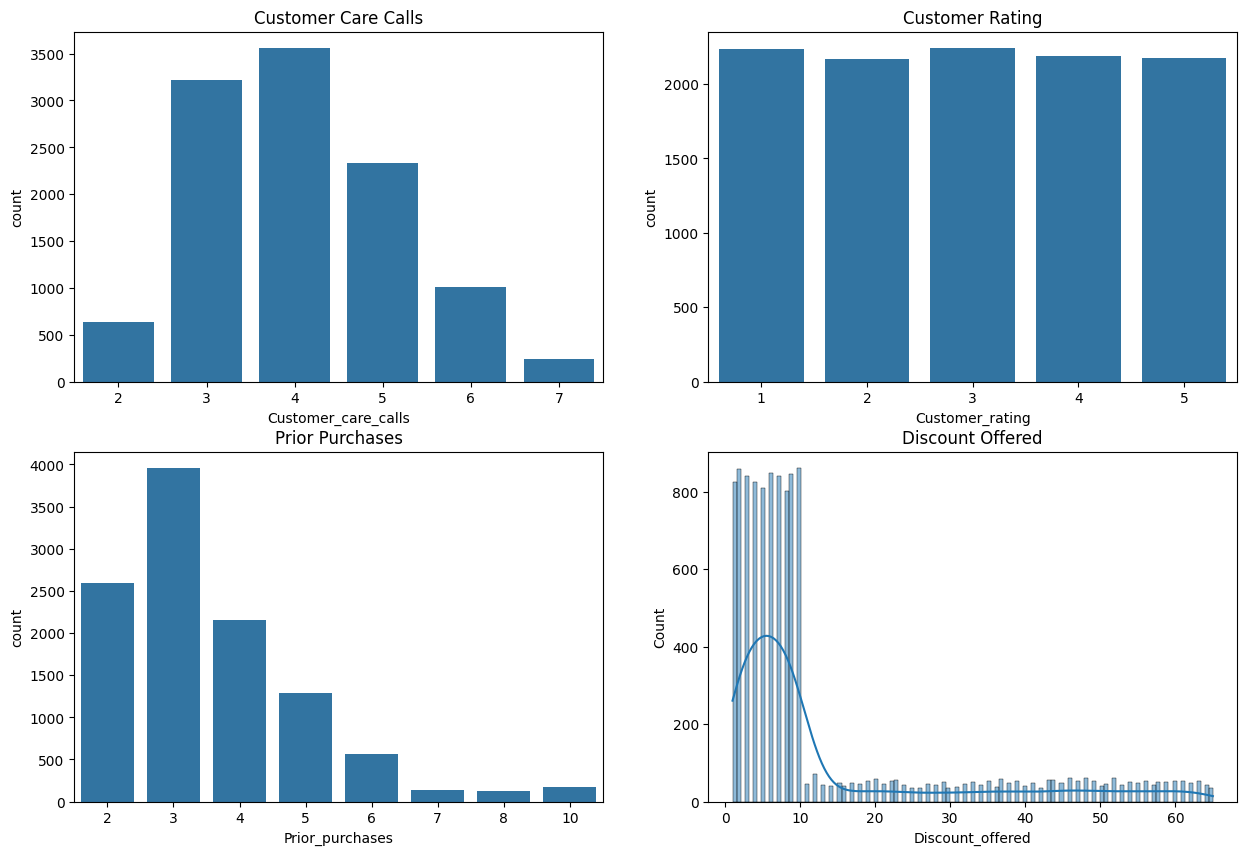

In [ ]:
# Customer Experience

fig, ax = plt.subplots(2,2,figsize=(15,10))
sns.countplot(x = 'Customer_care_calls', data = df, ax=ax[0,0]).set_title('Customer Care Calls')
sns.countplot(x = 'Customer_rating', data = df, ax=ax[0,1]).set_title('Customer Rating')
sns.countplot(x = 'Prior_purchases', data = df, ax=ax[1,0]).set_title('Prior Purchases')
sns.histplot(x = 'Discount_offered', data = df, ax=ax[1,1], kde = True).set_title('Discount Offered')


Text(0.5, 1.0, 'Gender vs Reached on Time')

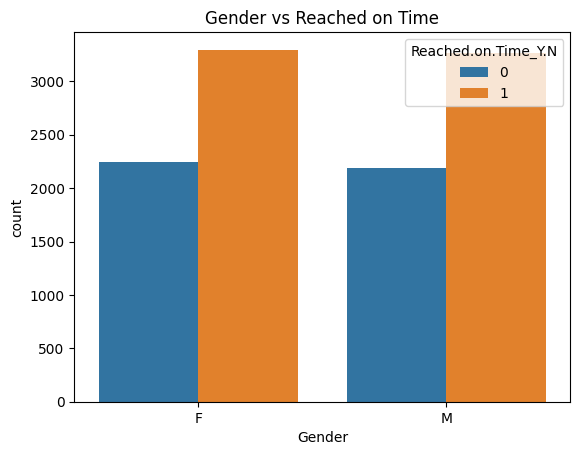

In [ ]:
# Customer Gender and Product Delivery

sns.countplot(x = 'Gender', data = df, hue = 'Reached.on.Time_Y.N').set_title('Gender vs Reached on Time')


In [ ]:

# fig, ax = plt.subplots(2,2,figsize=(15,10))
# sns.countplot(x = 'Customer_care_calls', data = df, ax=ax[0,0],hue = 'Reached.on.Time_Y.N').set_title('Customer Care Calls')
# sns.countplot(x = 'Customer_rating', data = df, ax=ax[0,1],hue = 'Reached.on.Time_Y.N').set_title('Customer Rating')
# sns.countplot(x = 'Prior_purchases', data = df, ax=ax[1,0],hue = 'Reached.on.Time_Y.N').set_title('Prior Purchases')
# sns.violinplot(x = 'Reached.on.Time_Y.N', y = 'Discount_offered' ,data = df, ax=ax[1,1]).set_title('Discount Offered')

# Encodings

In [ ]:

from sklearn.preprocessing import LabelEncoder

#Label encoding object
le = LabelEncoder()

#columns for label encoding
cols = ['Warehouse_block','Mode_of_Shipment','Product_importance', 'Gender']

#label encoding
for i in cols:
    le.fit(df[i])
    df[i] = le.transform(df[i])
    print(i, df[i].unique())


Warehouse_block [3 4 0 1 2]
Mode_of_Shipment [0 2 1]
Product_importance [1 2 0]
Gender [0 1]


# Correlation Matrix Heatmap


<Axes: >

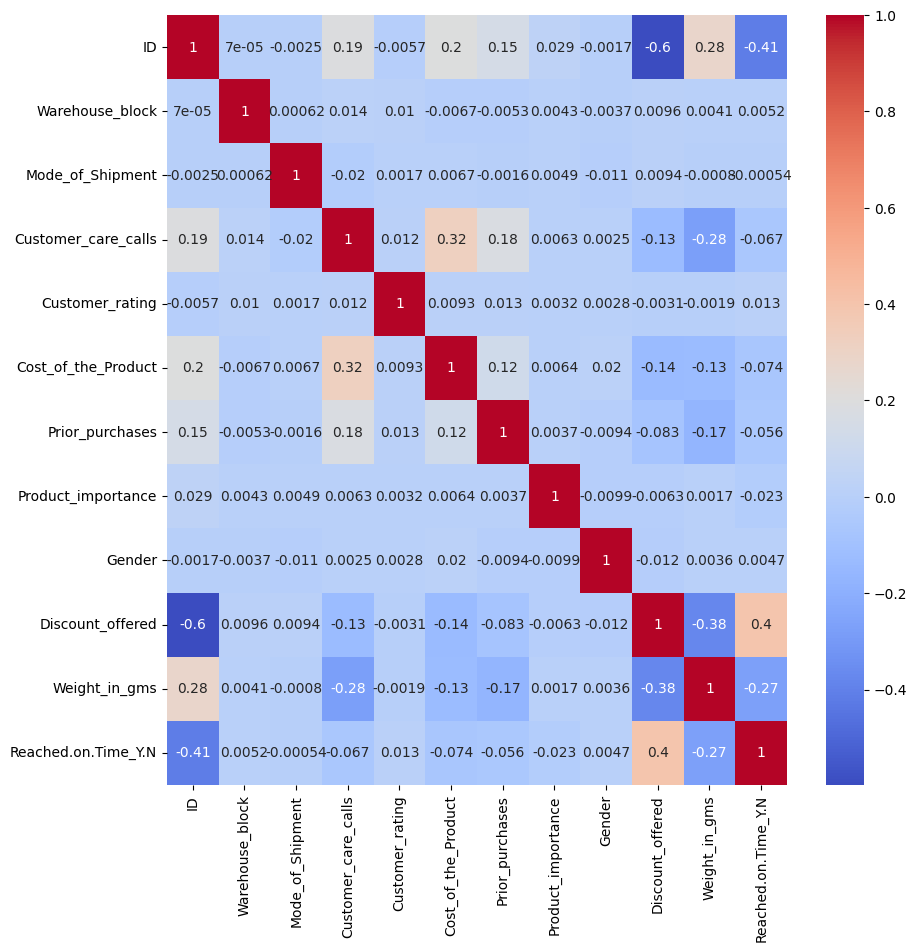

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

# Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('Reached.on.Time_Y.N', axis=1), df['Reached.on.Time_Y.N'], test_size=0.2, random_state=0)


In [ ]:

from sklearn.ensemble import RandomForestClassifier

#Random Forest Classifier Object
rfc = RandomForestClassifier()
from sklearn.model_selection import GridSearchCV

#Parameter grid
param_grid = {
    'max_depth': [4,8,12,16],
    'min_samples_leaf': [2,4,6,8],
    'min_samples_split': [2,4,6,8],
    'criterion': ['gini', 'entropy'],
    'random_state': [0,42]
}

# #GridSearchCV object
# grid = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring='accuracy')

# #Fitting the model
# grid.fit(X_train, y_train)

# #Best parameters
# print('Best parameters: ', grid.best_params_)


In [ ]:
rfc = RandomForestClassifier(criterion='gini', max_depth=20, min_samples_leaf=8, min_samples_split=2, random_state=42)

#Fitting the model
rfc.fit(X_train, y_train)
rfc_pred = rfc.predict(X_test)
print('Training accuracy: ', rfc.score(X_train, y_train))

Training accuracy:  0.9012387771337652


In [ ]:
from sklearn.tree import DecisionTreeClassifier

#Decision Tree Classifier Object
dtc = DecisionTreeClassifier()


In [ ]:
# #Using GridSearchCV for hyperparameter tuning
# from sklearn.model_selection import GridSearchCV
# #Parameter grid
# param_grid = {
#     'max_depth': [2,4,6,8],
#     'min_samples_leaf': [2,4,6,8],
#     'min_samples_split': [2,4,6,8],
#     'criterion': ['gini', 'entropy'],
#     'random_state': [0,42]}

# #GridSearchCV object
# grid = GridSearchCV(estimator=dtc, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring='accuracy')

# #Fitting the model
# grid.fit(X_train, y_train)

# #Best parameters
# print('Best parameters: ', grid.best_params_)

dtc = DecisionTreeClassifier(criterion='gini', max_depth=10, min_samples_leaf=10, min_samples_split=2, random_state=0, class_weight='balanced')

#Fitting the model
dtc.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=10,
                       min_samples_leaf=10, random_state=0)

In [ ]:
print('Training accuracy: ', dtc.score(X_train, y_train))
dtc_pred = dtc.predict(X_test)

Training accuracy:  0.7225821116035913


In [ ]:
from sklearn.linear_model import LogisticRegression

#Logistic Regression Object
lr = LogisticRegression(verbose=3,max_iter=1000)

In [ ]:
#fitting the model
lr.fit(X_train, y_train)
lr.score(X_train, y_train)
lr_pred = lr.predict(X_test)
print('Training accuracy: ', lr.score(X_train, y_train))


Training accuracy:  0.6587112171837709


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

#KNN Classifier Object
knn = KNeighborsClassifier()

#fitting the model
knn.fit(X_train, y_train)

#training accuracy
knn.score(X_train, y_train)

knn_pred = knn.predict(X_test)
print('Training accuracy: ', knn.score(X_train, y_train))

Training accuracy:  0.7808841913853847


In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, mean_absolute_error, r2_score, mean_squared_error


# fig, ax = plt.subplots(2,2,figsize=(15,10))
# sns.heatmap(confusion_matrix(y_test, rfc_pred), annot=True, cmap='coolwarm', ax=ax[0,0]).set_title('Random Forest Classifier')
# sns.heatmap(confusion_matrix(y_test, dtc_pred), annot=True, cmap='coolwarm', ax=ax[0,1]).set_title('Decision Tree Classifier')
# sns.heatmap(confusion_matrix(y_test, lr_pred), annot=True, cmap='coolwarm', ax=ax[1,0]).set_title('Logistic Regression')
# sns.heatmap(confusion_matrix(y_test, knn_pred), annot=True, cmap='coolwarm', ax=ax[1,1]).set_title('KNN Classifier')

from sklearn.metrics import confusion_matrix

# Random Forest Classifier
rfc_cm = confusion_matrix(y_test, rfc_pred)
print("Random Forest Confusion Matrix:\n", rfc_cm)

# Decision Tree Classifier
dtc_cm = confusion_matrix(y_test, dtc_pred)
print("\nDecision Tree Confusion Matrix:\n", dtc_cm)

# Logistic Regression
lr_cm = confusion_matrix(y_test, lr_pred)
print("\nLogistic Regression Confusion Matrix:\n", lr_cm)

# KNN Classifier
knn_cm = confusion_matrix(y_test, knn_pred)
print("\nKNN Confusion Matrix:\n", knn_cm)


Random Forest Confusion Matrix:
 [[760 148]
 [560 732]]

Decision Tree Confusion Matrix:
 [[810  98]
 [622 670]]

Logistic Regression Confusion Matrix:
 [[563 345]
 [425 867]]

KNN Confusion Matrix:
 [[575 333]
 [403 889]]


In [ ]:
#classification report
print('Random Forest Classifier: \n', classification_report(y_test, rfc_pred))

Random Forest Classifier: 
               precision    recall  f1-score   support

           0       0.58      0.84      0.68       908
           1       0.83      0.57      0.67      1292

    accuracy                           0.68      2200
   macro avg       0.70      0.70      0.68      2200
weighted avg       0.73      0.68      0.68      2200



In [ ]:
print('Decision Tree Classifier: \n', classification_report(y_test, dtc_pred))

Decision Tree Classifier: 
               precision    recall  f1-score   support

           0       0.57      0.89      0.69       908
           1       0.87      0.52      0.65      1292

    accuracy                           0.67      2200
   macro avg       0.72      0.71      0.67      2200
weighted avg       0.75      0.67      0.67      2200



In [ ]:
print('Logistic Regression: \n', classification_report(y_test, lr_pred))

Logistic Regression: 
               precision    recall  f1-score   support

           0       0.57      0.62      0.59       908
           1       0.72      0.67      0.69      1292

    accuracy                           0.65      2200
   macro avg       0.64      0.65      0.64      2200
weighted avg       0.66      0.65      0.65      2200



In [ ]:
print('KNN Classifier: \n', classification_report(y_test, knn_pred))

KNN Classifier: 
               precision    recall  f1-score   support

           0       0.59      0.63      0.61       908
           1       0.73      0.69      0.71      1292

    accuracy                           0.67      2200
   macro avg       0.66      0.66      0.66      2200
weighted avg       0.67      0.67      0.67      2200



In [ ]:
print('Random Forest : ', rfc.score(X_train, y_train))
print('Decision Tree : ', dtc.score(X_train, y_train))
print('Logistic regression : ', lr.score(X_train, y_train))
print('KNN : ', knn.score(X_train, y_train))

Random Forest :  0.9012387771337652
Decision Tree :  0.7225821116035913
Logistic regression :  0.6587112171837709
KNN :  0.7808841913853847


<ipython-input-66-5e41ec57e418>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=accuracy, palette='magma').set_title('Model Comparison')


Text(0, 0.5, 'Accuracy')

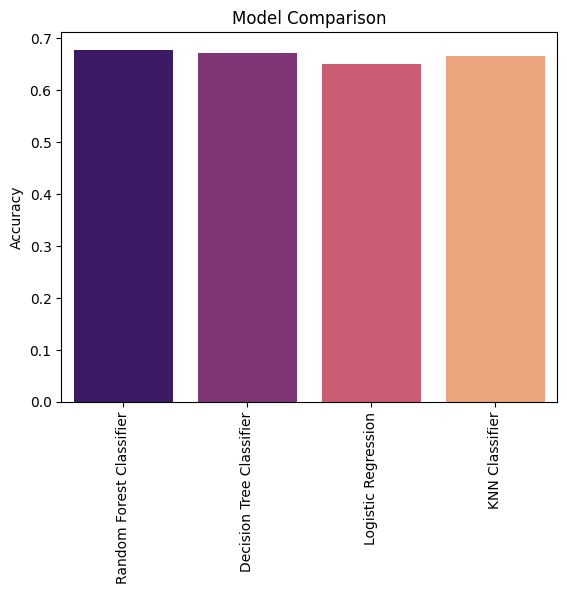

In [ ]:
models = ['Random Forest Classifier', 'Decision Tree Classifier', 'Logistic Regression', 'KNN Classifier']
accuracy = [accuracy_score(y_test, rfc_pred), accuracy_score(y_test, dtc_pred), accuracy_score(y_test, lr_pred), accuracy_score(y_test, knn_pred)]
sns.barplot(x=models, y=accuracy, palette='magma').set_title('Model Comparison')
plt.xticks(rotation=90)
plt.ylabel('Accuracy')